[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RikVoorhaar/probastat2020/blob/master/notebooks/serie12.ipynb?hl=fr)

# Série 12

## Exercice 1

<div class="alert alert-info">
**Exercice** (Produit de matrices stochastiques.) 

Soit $P$ et $Q$ des matrices stochastiques sur un ensemble dénombrable $E$. On définit le produit de $P$ avec $Q$

$$
PQ=(PQ(x,z))_{(x,z)\in  E\times E}
$$

par la formule

$$
PQ(x,z)=\sum_{y\in E} P(x,y)Q(y,z).
$$

Prouver que $PQ$ est une matrice stochastique.
    
</div>

Rappelons que $P$ est stochastique si et seulement si $\sum_{y\in E}P(x,y)=1$. Nous calculons,

$$
\begin{align}
\sum_{z\in E}PQ(x,z) &= \sum_{z\in E}\sum_{y\in E}P(x,y)Q(y,z)\\
&= \sum_{y\in E}\sum_{z\in E}P(x,y)Q(y,z)\\
&= \sum_{y\in E}P(x,y)\\
&=1
\end{align}
$$

Et donc $PQ$ est aussi stochastique. On a pu changer l'ordre de sommation parce que $E$ est dénombrable et la somme converge absolument. 

## Exercice 2

<div class="alert alert-info">
**Exercice** (Mesure invariante.)
    
Soit $P$ et $Q$ des matrices stochastiques sur un ensemble dénombrable $E$. Soit $m$ une mesure sur $E$ invariante par $P$ et $Q$.
Prouver que $m$ est invariante par $PQ$.
    
</div>

Rappelons que $m$ est invariant par $P$ si et seulement si $mP=m$. Alors, $mPQ = mQ=m$, et $m$ est invariant par $PQ$.

## Exercice 3

<div class="alert alert-info">
**Exercice** (Un système non-réversible.) 
    
Soit $E$ un ensemble dénombrable ou fini, soit $P$ une matrice stochastique sur $E$. Supposons $P$  irréductible. Supposons que $m$ est une mesure invariante qui n'est pas identiquement nulle. 
    
</div>

### Exercice 3a)

<div class="alert alert-info">
**Exercice** 
    
Prouver que $m$  est $P$-réversible si et seulement si $P=\hat{P}$.
Indication : c'est évident.
    
</div>

Rappelons que $m$ est $P$-réversible si et seulement si $m(x)P(x,y) = m(y)P(y,x)$, et rappelons que $\hat P$ est défini par $m(y)\hat P(y,x)=m(x)P(x,y)$. Si $\hat P=P$ alors on a que $m$ est $P$-réversible.

Si $m$ est $P$-réversible on a que $\forall x,y$ 

$$
m(y)P(y,x) = m(x)P(x,y) = m(y)\hat P(y,x)
$$

Comme $P$ est irréductible on sait que $\forall y$, $m(y)>0$ (Proposition 15.9), et donc $P(y,x)=\hat P(y,x)$.

On conclut que $P=\hat P$ si et seulement si $m$ est $P$-réversible.

### Exercice 3b)

<div class="alert alert-info">
**Exercice** 
    
Prouver que $\hat{P}$ est irréductible.
    
</div>

 C'est évident en terme des graphes de $P$ et $\hat{P}$ : puisque $P$ est irréductible on peut passer de $y$ à $x$ selon $P$, donc par définition de $\hat{P}$, on peut suivre le même chemin à l'envers pour passer de $x$ à $y$ selon $\hat{P}$.
 
 Plus concrétement, on doit montrer que pour chaque $x,y$ il existe un $n$ tel que $\hat P(x,y)^n>0$. Comme $m(x)>0$, $\forall x$ on a que 

$$
\hat P(x,y)^n = \frac{\left(m(x)\hat P(x,y)\right)^n}{m(x)^n} = \frac{\left(m(y) P(y,x)\right)^n}{m(x)^n}
$$

Car $P$ est irréductible il existe un $n$ tel que $P(y,x)^n>0$, est donc $\hat P(x,y)^n>0$ pour cet $n$ aussi. On conclut que $\hat P$ est irréductible.

### Exercice 3c)

<div class="alert alert-info">
**Exercice** 
    
Soit $E=\{1;2;3\}$. On considère la matrice stochastique

$$
P=\left(\begin{array}{cccc}
0&2/3&1/3\\
1/3&0&2/3\\
2/3&1/3&0\\
\end{array}\right).
$$
    
Dessiner le graphe de $P$ en orientant chaque arête et en indiquant son poids. Déterminer l'unique mesure de probabilité $m$ sur $E$ qui est $P$-invariante. Est-ce que $m$ est $P$-réversible ?
    
    
</div>

Si on échange deux arrêtes, le graphe reste invariant, alors une mesure $P$-invariante doit être symmétrique dans ses entrées et donc $m=(1/3,1/3,1/3)$. On voit que bien 

$$
mP = \left(\frac13,\frac13,\frac13\right)\left(\begin{array}{cccc}
0&2/3&1/3\\
1/3&0&2/3\\
2/3&1/3&0\\
\end{array}\right)=\left(\frac13,\frac13,\frac13\right)
$$

Si $m$ est $P$-réversible on a que 

$$
m(x)P(x,y)=m(y)P(y,x)
$$

Comme $m(x)=1/3$, $\forall x$ ce signifie que $P(x,y)=P(y,x)$, qui est faux. Donc $m$ n'est pas $P$-réversible.

On peut dessiner le graphe de $P$ en utilisant la librarie `networkx`.

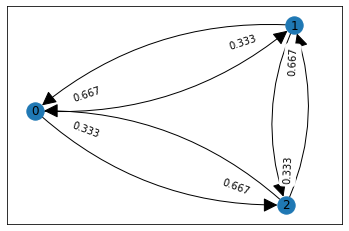

In [44]:
import networkx as nx
import matplotlib.pyplot as plt

P = [[0,2/3,1/3],[1/3,0,2/3],[2/3,1/3,0]]
G = nx.MultiDiGraph()
edge_labels = dict()
for i in range(3):
    for j in range(3):
        if P[i][j]>0:
            G.add_edge(i,j,rad=0.4)
            edge_labels[(i,j)]=f"{P[i][j]:.3f}"
pos = nx.spring_layout(G)

plt.figure()
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G,pos,connectionstyle=f'arc3, rad =0.2',arrowsize=30)
nx.draw_networkx_edge_labels(G,pos,edge_labels,label_pos=0.8);